In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('Churn_Modelling.csv')

In [27]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [29]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [31]:
print(data['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [32]:
print(data['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [33]:
print(data['Gender'].value_counts())

Gender
Male      5457
Female    4543
Name: count, dtype: int64


Now doing one hot encoding for the object data type to make it numeric

In [34]:
data = pd.get_dummies(data,columns=['Geography','Gender'] , drop_first=True)

In [35]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [36]:
data.shape

(10000, 12)

In [37]:
X = data.drop(columns=['Exited'])
y= data['Exited']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()
model.add(Dense(11,activation='relu', input_dim= 11))
model.add(Dense(11,activation='relu', input_dim= 11))
model.add(Dense(1,activation='sigmoid'))

e:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(loss='binary_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

In [45]:
history=model.fit(X_test_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6883 - loss: 0.6201 - val_accuracy: 0.7750 - val_loss: 0.5843
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7770 - loss: 0.5600 - val_accuracy: 0.7725 - val_loss: 0.5653
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7942 - loss: 0.5280 - val_accuracy: 0.7725 - val_loss: 0.5590
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7823 - loss: 0.5426 - val_accuracy: 0.7725 - val_loss: 0.5547
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7823 - loss: 0.5343 - val_accuracy: 0.7725 - val_loss: 0.5523
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7868 - loss: 0.5242 - val_accuracy: 0.7725 - val_loss: 0.5502
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7947 - loss: 0.5092 - val_accuracy: 0.7725 - val_loss: 0.5481
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7995 - loss: 0.5011 - val_accuracy: 0.7725 - v

In [47]:
model.layers[0].get_weights()

[array([[-0.1109977 ,  0.5398202 ,  0.04154978,  0.21700014, -0.08465225,
          0.04514383, -0.6261042 ,  0.23093906,  0.33725905, -0.06203878,
         -0.39174587],
        [-0.00309151,  0.36585262,  0.00308269, -0.22566824, -0.48411733,
         -0.4880827 ,  0.12943758, -0.03302538, -0.02550982, -0.46536875,
          0.4721203 ],
        [-0.32795656, -0.44269565,  0.5391454 ,  0.20661357,  0.11816628,
         -0.5882742 ,  0.26061758,  0.02784673, -0.39190382, -0.13133168,
         -0.37866887],
        [ 0.2938226 , -0.62328833,  0.24025606, -0.24175425, -0.81568104,
          0.12233186,  0.17843257,  0.4509658 ,  0.09410501, -0.08633046,
          0.38128152],
        [ 0.5885417 , -0.06290247, -0.50232834,  0.11133388, -0.49753672,
          0.1593694 ,  0.40244555, -0.29144529, -0.7838589 ,  0.6402951 ,
          0.25809017],
        [-0.5880403 ,  0.2837537 ,  0.24761869, -0.26705468,  0.44910502,
          0.25000277, -0.20472495, -0.1682458 , -0.19246359, -0.3999881

In [63]:
y_prob = model.predict(X_test_scaled).ravel()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [64]:
y_prob

array([0.27308264, 0.08748627, 0.3438089 , ..., 0.19648075, 0.32459047,
       0.08517047], dtype=float32)

In [65]:
from sklearn.metrics import roc_curve

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [67]:
j = tpr - fpr
best_index = np.argmax(j)
best_threshold = thresholds[best_index]

In [68]:
best_threshold

np.float64(0.32231828570365906)

In [70]:
y_pred = np.where(y_prob>best_threshold,1,0)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test,y_pred)

0.738

In [75]:
import matplotlib.pyplot as plt

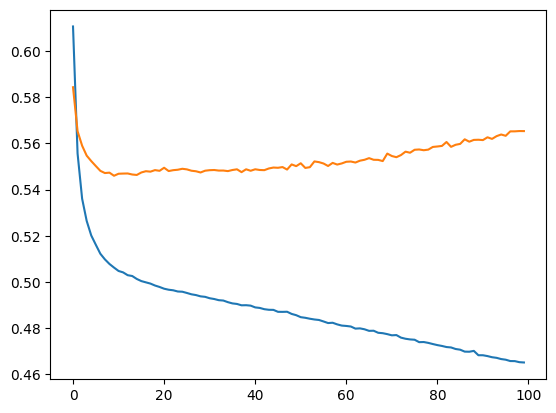

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


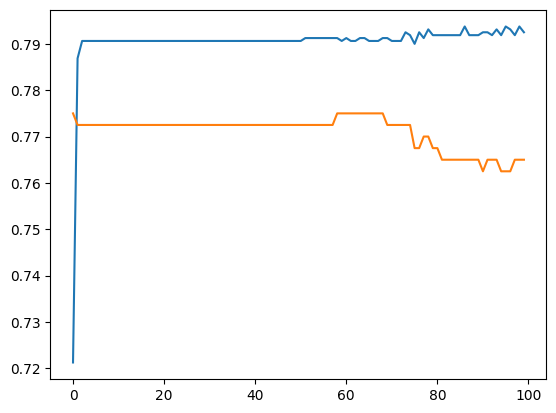

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Model is overfitted and with bad accuracy